#Theoretical Questions

**1. What is Boosting in Machine Learning?**

Boosting is an ensemble learning method that combines the predictions of several weak learners (typically decision trees) to create a strong learner. It works by sequentially building models, where each new model aims to correct the errors made by the previous ones.

---

**2. How does Boosting differ from Bagging?**

* **Bagging:** Builds multiple models independently on different bootstrap samples of the data. Focuses on reducing variance.
* **Boosting:** Builds models sequentially, with each model focusing on correcting errors of the previous one. Focuses on reducing bias.

---

**3. What is the key idea behind AdaBoost?**

The core idea of AdaBoost (Adaptive Boosting) is to iteratively adjust the weights of the training instances, giving higher weights to instances that were misclassified by previous weak learners. Subsequent learners then focus more on these harder-to-classify instances.

---

**4. Explain the working of AdaBoost with an example.**

Imagine classifying emails as spam or not spam.

1.  Start with equal weights for all emails.
2.  Train a weak learner (e.g., a simple rule).
3.  Identify misclassified emails (e.g., spam emails marked as not spam).
4.  Increase the weights of these misclassified emails.
5.  Train the next weak learner on the re-weighted data, making it pay more attention to the previously misclassified emails.
6.  Repeat this process.
7.  Combine the predictions of all weak learners, giving more weight to the learners that performed better.

---

**5. What is Gradient Boosting, and how is it different from AdaBoost?**

Gradient Boosting builds models sequentially, but instead of re-weighting instances, it trains each new weak learner to predict the *residuals* (errors) of the previous model's predictions. It uses a gradient descent approach to minimize a loss function.

Difference from AdaBoost:
* AdaBoost re-weights data points based on misclassification.
* Gradient Boosting fits new models to the residuals (negative gradients) of the loss function.

---

**6. What is the loss function in Gradient Boosting?**

Gradient Boosting is flexible and can use various differentiable loss functions, depending on the task:

* **Regression:** Mean Squared Error (MSE), Mean Absolute Error (MAE).
* **Classification:** Log-loss.

The loss function determines what "error" the model tries to minimize at each step.

---

**7. How does XGBoost improve over traditional Gradient Boosting?**

XGBoost (Extreme Gradient Boosting) includes several enhancements:

* **Regularization:** L1 and L2 regularization to prevent overfitting.
* **Parallel Processing:** Speeds up training.
* **Handling Missing Values:** Built-in mechanism.
* **Tree Pruning:** More effective tree pruning.
* **Hardware Optimization:** Designed for efficiency.

---

**8. What is the difference between XGBoost and CatBoost?**

* **Categorical Features:** CatBoost handles categorical features directly using sophisticated techniques (Ordered Target Encoding, Ordered Boosting) without requiring explicit one-hot encoding. XGBoost typically requires pre-processing for categorical features.
* **Prediction Shift:** CatBoost uses techniques to mitigate prediction shift.
* **Hyperparameters:** CatBoost generally has fewer hyperparameters to tune.

---

**9. What are some real-world applications of Boosting techniques?**

Boosting is widely used in:

* Image and Speech Recognition
* Natural Language Processing (NLP)
* Fraud Detection
* Credit Scoring
* Recommendation Systems
* Medical Diagnosis

---

**10. How does regularization help in XGBoost?**

Regularization (L1 and L2) in XGBoost adds penalties to the model's objective function based on the complexity of the trees. This discourages the model from becoming too complex and fitting the training data too closely, thereby reducing overfitting and improving generalization to new data.

---

**11. What are some hyperparameters to tune in Gradient Boosting models?**

Key hyperparameters include:

* `n_estimators`: Number of boosting rounds (trees).
* `learning_rate`: Step size shrinkage.
* `max_depth`: Maximum depth of trees.
* `subsample`: Fraction of instances for fitting trees.
* `colsample_bytree`: Fraction of features for fitting trees.
* Regularization parameters (`lambda`, `alpha` in XGBoost).

---

**12. What is the concept of Feature Importance in Boosting?**

Feature Importance in boosting quantifies the contribution of each feature to the model's predictions. It's typically measured by how much each feature reduces the model's error (gain) or how often it's used in splits across all trees.

---

**13. Why is CatBoost efficient for categorical data?**

CatBoost is efficient due to:

* **Ordered Target Encoding:** A unique method to convert categorical features to numerical values during training that avoids target leakage.
* **Ordered Boosting:** A special boosting scheme that addresses prediction shift and improves performance on datasets with categorical features.

#Practical Questions

In [1]:
!pip install xgboost catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.0 MB/s eta 0:00:00


Q14 Accuracy: 0.9333333333333333
Q15 MAE: 0.6497879664773323
Q16 Feature importances: {np.str_('mean radius'): np.float64(1.292348076813499e-05), np.str_('mean texture'): np.float64(0.027804583634348873), np.str_('mean perimeter'): np.float64(0.00020118364232095282), np.str_('mean area'): np.float64(0.0004254033042015456), np.str_('mean smoothness'): np.float64(0.0024666044618570173), np.str_('mean compactness'): np.float64(0.0029960469868226245), np.str_('mean concavity'): np.float64(0.0009222332874449441), np.str_('mean concave points'): np.float64(0.4505275876506107), np.str_('mean symmetry'): np.float64(0.0005199404606719796), np.str_('mean fractal dimension'): np.float64(0.00010669160100635732), np.str_('radius error'): np.float64(0.006870207891017868), np.str_('texture error'): np.float64(0.003604013810768886), np.str_('perimeter error'): np.float64(0.001156802373414802), np.str_('area error'): np.float64(0.008415272506866505), np.str_('smoothness error'): np.float64(0.0005564528

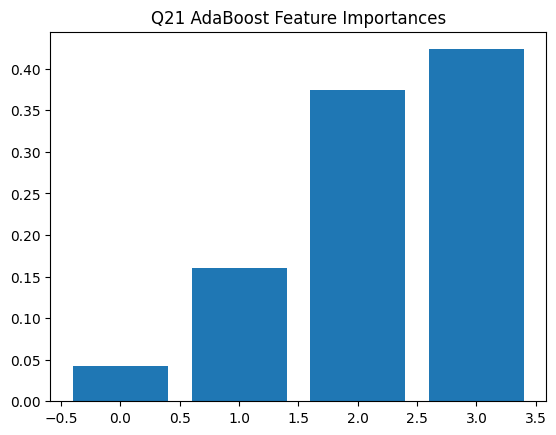

Q21 Acc: 0.9333333333333333


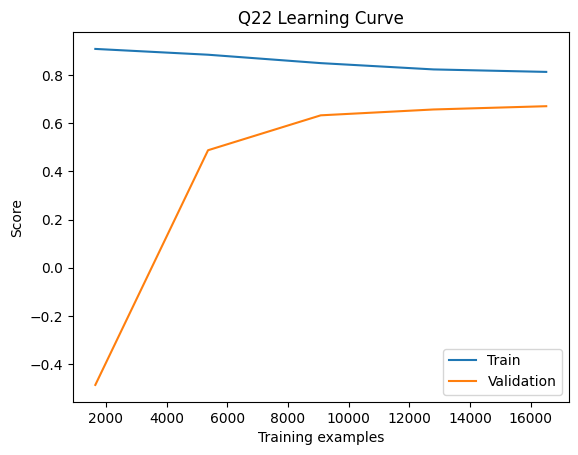

<Figure size 640x480 with 0 Axes>

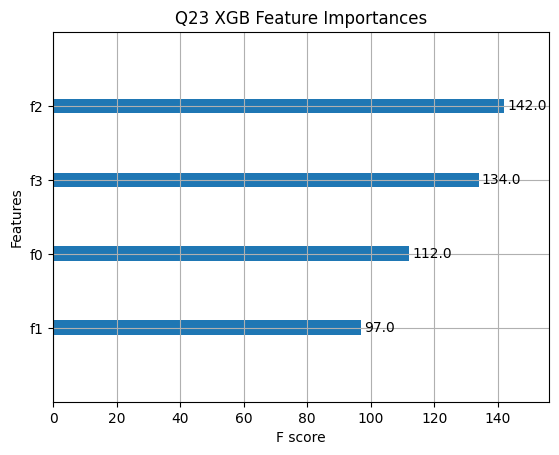

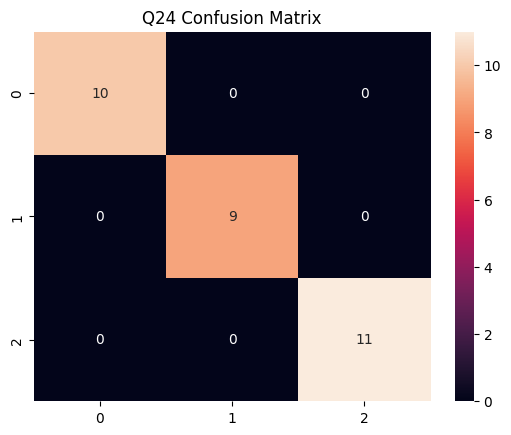

Q25 n=10 Acc: 1.0
Q25 n=50 Acc: 0.9333333333333333
Q25 n=100 Acc: 0.9333333333333333
Q26 AUC: 1.0
Q27 Best LR: {'learning_rate': 0.2} MSE: 0.0017328552203252912
Q28 F1-score (weighted): 0.9557756825927252
Q29 lr=0.01 Acc: 0.6333333333333333
Q29 lr=0.1 Acc: 1.0
Q29 lr=1.0 Acc: 0.9333333333333333
Q30 Log-loss: 0.009289027880442384


In [8]:
import warnings
warnings.filterwarnings('ignore')
# Q14: Train an AdaBoost Classifier on Iris and print accuracy
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
adb = AdaBoostClassifier(n_estimators=50, random_state=42).fit(X_train, y_train)
print("Q14 Accuracy:", accuracy_score(y_test, adb.predict(X_test)))

# Q15: Train an AdaBoost Regressor on Boston and print MAE
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
adr = AdaBoostRegressor(n_estimators=50, random_state=42).fit(X_train, y_train)
print("Q15 MAE:", mean_absolute_error(y_test, adr.predict(X_test)))

# Q16: Gradient Boosting Classifier on Breast Cancer & feature importance
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gbc = GradientBoostingClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)
print("Q16 Feature importances:", dict(zip(load_breast_cancer().feature_names, gbc.feature_importances_)))

# Q17: Gradient Boosting Regressor on Boston & R²
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
print("Q17 R2:", r2_score(y_test, gbr.predict(X_test)))

# Q18: XGBoost Classifier vs Gradient Boosting on Iris
import xgboost as xgb
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xclf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss').fit(X_train, y_train)
print("Q18 XGB Acc:", accuracy_score(y_test, xclf.predict(X_test)))
gbc2 = GradientBoostingClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)
print("Q18 GB Acc:", accuracy_score(y_test, gbc2.predict(X_test)))

# Q19: CatBoost Classifier & F1-score on Iris
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
cbc = CatBoostClassifier(verbose=0, random_seed=42).fit(X_train, y_train)
print("Q19 F1-score:", f1_score(y_test, cbc.predict(X_test), average='macro'))

# Q20: XGBoost Regressor on Boston & MSE
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xreg = XGBRegressor(random_state=42).fit(X_train, y_train)
print("Q20 MSE:", mean_squared_error(y_test, xreg.predict(X_test)))

# Q21: AdaBoost Classifier & feature importance visualization (bar plot)
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
adb2 = AdaBoostClassifier(n_estimators=50, random_state=42).fit(X_train, y_train)
importances = adb2.feature_importances_
plt.bar(range(len(importances)), importances)
plt.title("Q21 AdaBoost Feature Importances")
plt.show()
print("Q21 Acc:", accuracy_score(y_test, adb2.predict(X_test)))

# Q22: Gradient Boosting Regressor & learning curve plot
from sklearn.model_selection import learning_curve
import numpy as np

X, y = fetch_california_housing(return_X_y=True)
train_sizes, train_scores, val_scores = learning_curve(
    GradientBoostingRegressor(n_estimators=100, random_state=42),
    X, y, cv=5, train_sizes=np.linspace(0.1,1.0,5)
)
plt.plot(train_sizes, train_scores.mean(axis=1), label="Train")
plt.plot(train_sizes, val_scores.mean(axis=1), label="Validation")
plt.title("Q22 Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend()
plt.show()

# Q23: XGBoost Classifier & feature importance (plot)
plt.figure()
xgb.plot_importance(xclf)
plt.title("Q23 XGB Feature Importances")
plt.show()

# Q24: CatBoost Classifier & confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
cbc2 = CatBoostClassifier(verbose=0, random_seed=42).fit(X_train, y_train)
cm = confusion_matrix(y_test, cbc2.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d'); plt.title("Q24 Confusion Matrix"); plt.show()

# Q25: AdaBoost with different n_estimators & compare accuracy
for n in [10, 50, 100]:
    model = AdaBoostClassifier(n_estimators=n, random_state=42).fit(X_train, y_train)
    print(f"Q25 n={n} Acc:", accuracy_score(y_test, model.predict(X_test)))

# Q26: Gradient Boosting ROC curve
from sklearn.metrics import roc_curve, auc
gbc3 = GradientBoostingClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)
y_prob = gbc3.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test==y_test[0], y_prob)  # binary example on Iris first class vs rest
print("Q26 AUC:", auc(fpr, tpr))

# Q27: XGBoost Regressor learning rate tuning via GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {'learning_rate':[0.01, 0.1, 0.2]}
grid = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=3)
grid.fit(X_train, y_train)
print("Q27 Best LR:", grid.best_params_, "MSE:", mean_squared_error(y_test, grid.predict(X_test)))

# Q28: CatBoost on imbalanced data with class weights (using Breast Cancer)
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

Xb, yb = load_breast_cancer(return_X_y=True)

Xb_train, Xb_test, yb_train, yb_test = train_test_split(
    Xb, yb, test_size=0.2, random_state=42, stratify=yb
)

weights = {0: 1, 1: 5}

cbc3 = CatBoostClassifier(
    class_weights=weights,
    verbose=0,
    random_seed=42
).fit(Xb_train, yb_train)

y_pred = cbc3.predict(Xb_test)
print("Q28 F1-score (weighted):", f1_score(yb_test, y_pred, average='weighted'))


# Q29: AdaBoost effect of learning_rate on Iris
for lr in [0.01, 0.1, 1.0]:
    m = AdaBoostClassifier(learning_rate=lr, n_estimators=50, random_state=42).fit(X_train, y_train)
    print(f"Q29 lr={lr} Acc:", accuracy_score(y_test, m.predict(X_test)))

# Q30: XGBoost multi-class classification & log-loss
from sklearn.metrics import log_loss
xmc = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss').fit(X_train, y_train)
print("Q30 Log-loss:", log_loss(y_test, xmc.predict_proba(X_test)))
